# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [30]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [17]:
titanic_df=pd.read_csv("ML_Titanic_dataset (1).csv")

❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [18]:
titanic_df.shape
titanic_df.head()
titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [21]:
titanic_df.drop("Cabin", axis=1, inplace=True)

## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [35]:
pclass_df=titanic_df.groupby("Pclass").agg({"Ticket":"count"})


Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

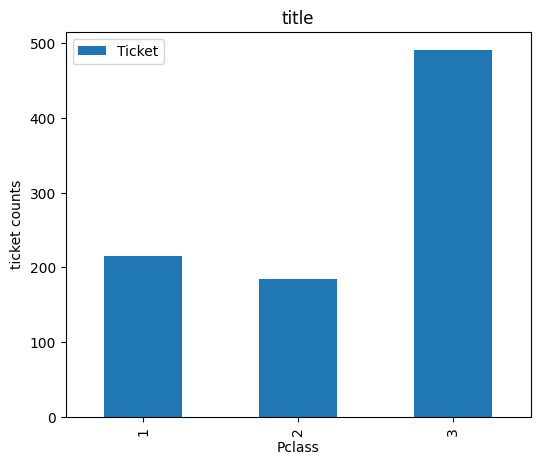

In [37]:
pclass_df.plot(kind='bar', title='title', ylabel='ticket counts',
         xlabel='Pclass', figsize=(6, 5))
plt.show()

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

In [39]:
titanic_df["Survived"]
survived_df=titanic_df.groupby("Pclass").agg({"Survived":"mean"})
#df['sales'] / df.groupby('state')['sales'].transform('sum')

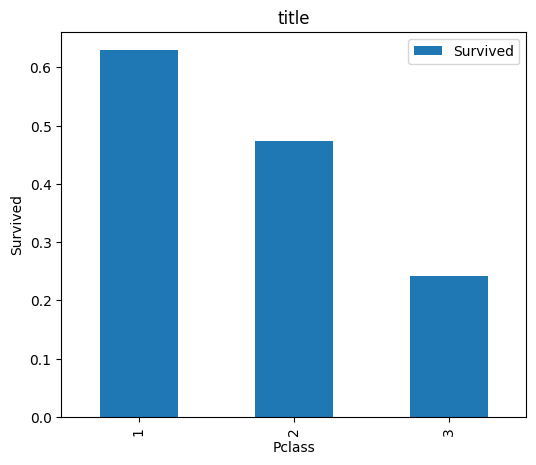

In [40]:
survived_df.plot(kind='bar', title='title', ylabel='Survived',
         xlabel='Pclass', figsize=(6, 5))
plt.show()

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [41]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

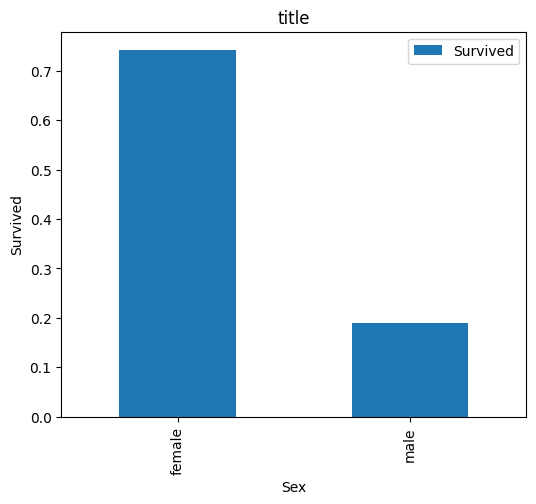

In [42]:
sex_df=titanic_df.groupby("Sex").agg({"Survived":"mean"})
sex_df.plot(kind='bar', title='title', ylabel='Survived',
         xlabel='Sex', figsize=(6, 5))
plt.show()

Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

In [44]:
survivors_df=titanic_df.groupby("Sex").agg({"PassengerId":"count","Survived":"sum"})

survivors_df.columns=["Total","Survived"]

In [45]:
survivors_df

,Total,Survived
Sex,,
female,314,233
male,577,109


## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [62]:
children_df=titanic_df[titanic_df["Age"]<18]

❓ Titanic’te kaç çocuk vardı?

In [48]:
children_df.shape[0]

113

❓Kaç çocuk hayatta kaldı?

In [49]:
children_df[children_df["Survived"]==1].shape[0]

61

❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

In [52]:
child_survivors_df=children_df.groupby("Sex").agg({"PassengerId":"count","Survived":"sum"})
child_survivors_df.columns=["Total","Survived"]

In [53]:
survivors_df.subtract(child_survivors_df)

,Total,Survived
Sex,,
female,259,195
male,519,86


In [65]:
survivors_df_nochild=survivors_df.subtract(child_survivors_df)


In [63]:
children_df2=child_survivors_df.sum()

children_df2  = pd.DataFrame(children_df2).transpose()
children_df2.index=["Children"] 

In [64]:
children_df2

,Total,Survived
Children,113,61


In [66]:
pd.concat([survivors_df_nochild,children_df2],axis=0)

,Total,Survived
female,259,195
male,519,86
Children,113,61


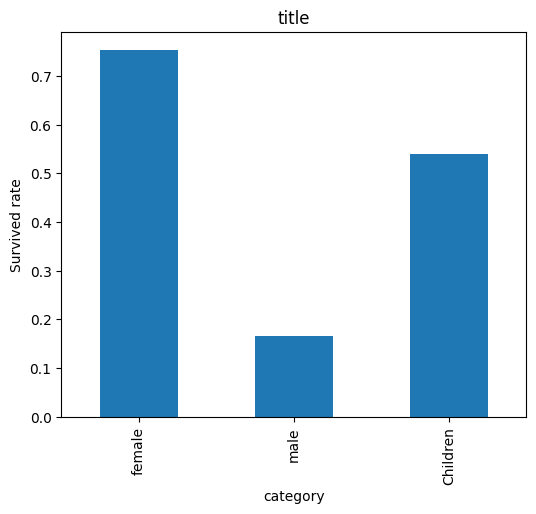

In [67]:
final_df=pd.concat([survivors_df_nochild,children_df2],axis=0)
final_df["Survied Rate"]=final_df["Survived"]/final_df["Total"]
final_df["Survied Rate"].plot(kind='bar', title='title', ylabel='Survived rate',
         xlabel='category', figsize=(6, 5))
plt.show()

## [Opsiyonal] Big families

❓ Daha büyük ailelerin hayatta kalması daha mı zordu?

Burada, yolcunun aile büyüklüğünü gösteren yeni bir sütunu `DataFrame` ine ekleyeceksin.
  

In [ ]:
# SENİN KODUN BURAYA

## [Opsiyonal] Distinguished titles

❓ Tahliye sırasında ünvanı (Mr, Mrs, Dr vb.) olan yolculara daha fazla öncelik verildi mi?

Bunu incelemek için, bazı string manipülasyonları yaparak her yolcu için ünvanını içeren yeni bir sütun oluştur.

In [ ]:
# SENİN KODUN BURAYA